In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Models.Layers import *
from Solver import *
from Models.Classifiers.Logistic_Classifier import *
from General_Solver import *

In [2]:
# first step would be to import the dataset
X_full = pd.read_csv('./Datasets/red_wine_dataset.csv')
percentage = 0.8
X_full.pop('k_value')
X_full.pop('l_value')
X_full.pop('m_value')
X_train = X_full.sample(frac=percentage, random_state=0)
y_train = X_train.pop('quality')
X_test = X_full.drop(X_train.index)
y_test = X_test.pop('quality')
print(len(X_train.index))
print(len(X_test.index))
X_full


1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,13.750000,0.6615


In [3]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(y_train.shape)

(1279, 13)
(320, 13)
float64
(1279,)


In [4]:
# #classic way to plot the data
# for i in range(x_train.shape[0]):
#     if(y_train[i] == 1):
#         plt.scatter(x_train[i,0], x_train[i,1], color='red')
#     else:
#         plt.scatter(x_train[i,0], x_train[i,1], color='blue')
# plt.xlabel('fixed acidity')
# plt.ylabel('volatile acidity')
# plt.title('Red Wine Dataset')
# plt.show()

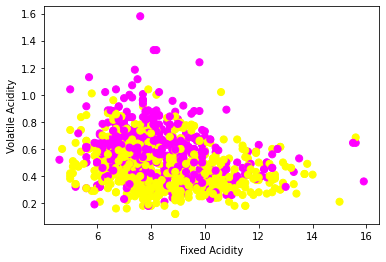

In [5]:
#quicker way to plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

(1279, 13)
(1279,)
0.12433391471702653
0.10003662221022867


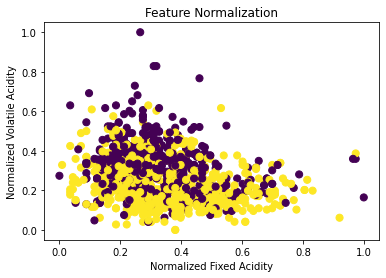

In [6]:
#Normalizing the data (mean=0, std=1)
x_max = np.max(x_train, axis = 0)
x_min = np.min(x_train, axis = 0)
x_train = (x_train - x_min) / (x_max - x_min)
mu = x_min
sigma = (x_max - x_min)
print(x_train.shape)
print(y_train.shape)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50)
plt.title('Feature Normalization')
plt.xlabel('Normalized Fixed Acidity')
plt.ylabel('Normalized Volatile Acidity')
print(x_train[:,3].mean())
print(x_train[:,3].std())
plt.show()


In [7]:
# Testing Gradient Descent and Internal Layers 
np.random.seed(0)
w = np.random.randn(x_train.shape[1], 1)
b = np.zeros((1, 1))
op, cache_sigmoid = sigmoid_forward(x_train[15:20], w, b )
# print(op)
loss,cache_logistic = cross_entropy_loss(op, y_train[15:20])
print("old loss = ", loss)
grads = cross_entropy_loss_backward(cache_logistic)
# print(grads.shape,'\n', grads)
dw, db = sigmoid_backward(grads, cache_sigmoid)
# print(dw.shape)
# print(db.shape)
b = b - 0.1 * db
w = w - 0.1 * dw
op_new,cache_sigmoid = sigmoid_forward(x_train[15:20], w, b)
print(np.dot(x_train[15:20],w) + b)
# print(op_new)
loss, cache_logistic = cross_entropy_loss(op_new, y_train[15:20].reshape(-1,1))
print("new loss = ",loss)




old loss =  [5.61635667]
[[0.99199222]
 [1.32586469]
 [1.65617951]
 [0.4061653 ]
 [1.37783006]]
new loss =  [4.90119085]


In [8]:
logistic_reg = Logisitic_Classifier(input_dim=x_train.shape[1])
Solver = GeneralSolver(logistic_reg, x_train, y_train, lr = 1.7e-4, batch_size = 15, num_epochs = 1000, print_every=1000)
Solver.train('sgd_momentum')

fine till here !
Epoch =  0 Batch =  0 Loss =  [10.40275385]
Epoch =  1 Batch =  0 Loss =  [10.37223275]
Epoch =  2 Batch =  0 Loss =  [10.26906092]
Epoch =  3 Batch =  0 Loss =  [10.16776043]
Epoch =  4 Batch =  0 Loss =  [10.07882041]
Epoch =  5 Batch =  0 Loss =  [9.99885504]
Epoch =  6 Batch =  0 Loss =  [9.92693824]
Epoch =  7 Batch =  0 Loss =  [9.86216818]
Epoch =  8 Batch =  0 Loss =  [9.80373925]
Epoch =  9 Batch =  0 Loss =  [9.75094691]
Epoch =  10 Batch =  0 Loss =  [9.70317213]
Epoch =  11 Batch =  0 Loss =  [9.65987066]
Epoch =  12 Batch =  0 Loss =  [9.62056348]
Epoch =  13 Batch =  0 Loss =  [9.58482841]
Epoch =  14 Batch =  0 Loss =  [9.55229286]
Epoch =  15 Batch =  0 Loss =  [9.52262753]
Epoch =  16 Batch =  0 Loss =  [9.49554089]
Epoch =  17 Batch =  0 Loss =  [9.47077445]
Epoch =  18 Batch =  0 Loss =  [9.44809868]
Epoch =  19 Batch =  0 Loss =  [9.4273094]
Epoch =  20 Batch =  0 Loss =  [9.4082247]
Epoch =  21 Batch =  0 Loss =  [9.39068227]
Epoch =  22 Batch =  0

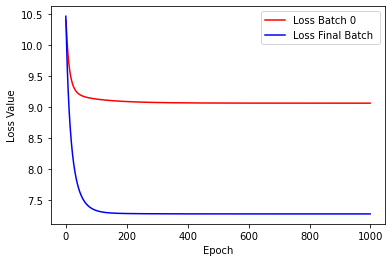

In [11]:
epochs = range(0,Solver.num_epochs)
plt.plot(epochs, Solver.loss_history, label = 'Loss Batch 0 ', color = 'red')
plt.plot(epochs, Solver.loss_final_history, label = 'Loss Final Batch ', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [12]:
def training_accuracy(model, x_train,y_train):
    y_pred = model.predict(x_train)
    y_new = y_train.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]


print("Test accuracy for logistic classifier = ",training_accuracy(logistic_reg, x_train, y_train)*100 ,'%')


Test accuracy for logistic classifier =  74.43315089913996 %


In [13]:
def test_accuracy(model, x_test, y_test, mu, sigma):
    y_pred = model.predict((x_test - mu) / sigma)
    y_new = y_test.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]


print("Test accuracy for logistic classifier = ", test_accuracy(logistic_reg, x_test, y_test, mu, sigma)*100, '%')


Test accuracy for logistic classifier =  73.4375 %


In [14]:
print ((np.sum(y_train == 1))/y_train.shape[0])

0.5316653635652854
